In [6]:
library(tidyverse)
library(janitor)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




# Data Description
The "players" dataset is a csv file with 7 columns and 196 rows. It is comma delimited and has a header row.

In the dataset, we can observe 7 variables. 
These variables are:
- experience
- subscribe
- hashedEmail
- played_hours
- name
- gender
- age

The variables experience, hashedEmail, name and gender are of type string. The variable subscribe is of type boolean. The variables played_hours and Age are doubles. 

The variables are for the most part pretty self explanatory. Experience means the level of experience of the players, subscribe shows whether or not they are subscribed to a game-related newsletter. hashedEmail is the email of the players converted into a hash value. played_hours is the time in hours in which the players have spent playing minecraft. name is the user's name and gender is their gender. age is the age of the user.

Looking at the summary of the dataset, we can see that subscribe contains 52 false entries and 144 true entries. Moreover, played_hours has a median of 0.10 and a mean of 5.85. In the Age variable summary, we can observe that the median age of the players is 19, and the mean is 21.14.

# Questions

The broad question that I will address is Question 1. The question that I will be asking is: Can the age of the players and the time they spend playing Minecraft predict whether or not they are subscribed to a game-related newsletter in the dataset "players.csv". To answer this question, we can use the age of the players, the time they spent playing Minecraft, and whether or not they're subscribed to a gaming newsletter to address our question.

# Exploratory Data Analysis and Visualization

From figure 1, we can see that a large portion of the players tend to be between ages 15 and 25. This tells us that we will data relevant to these ages and thus, the accuracy of our predictions for ages outside of this group may not be as accurate. By figure 2, we can see that most players have played less than 20 hours and a few have played over 200, this variety of data could greatly affect the quality of our models. Moreover, as we can see from figure 3, there are almost 100 more players that are subscribed than not subscribed, which can also impact the accuracy of our predictions.

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


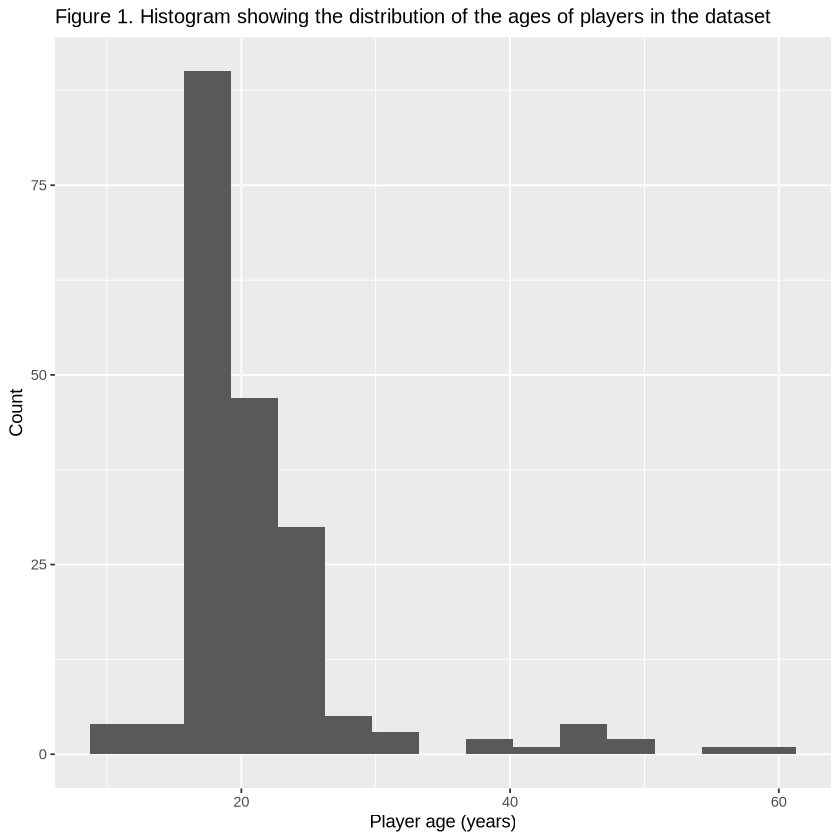

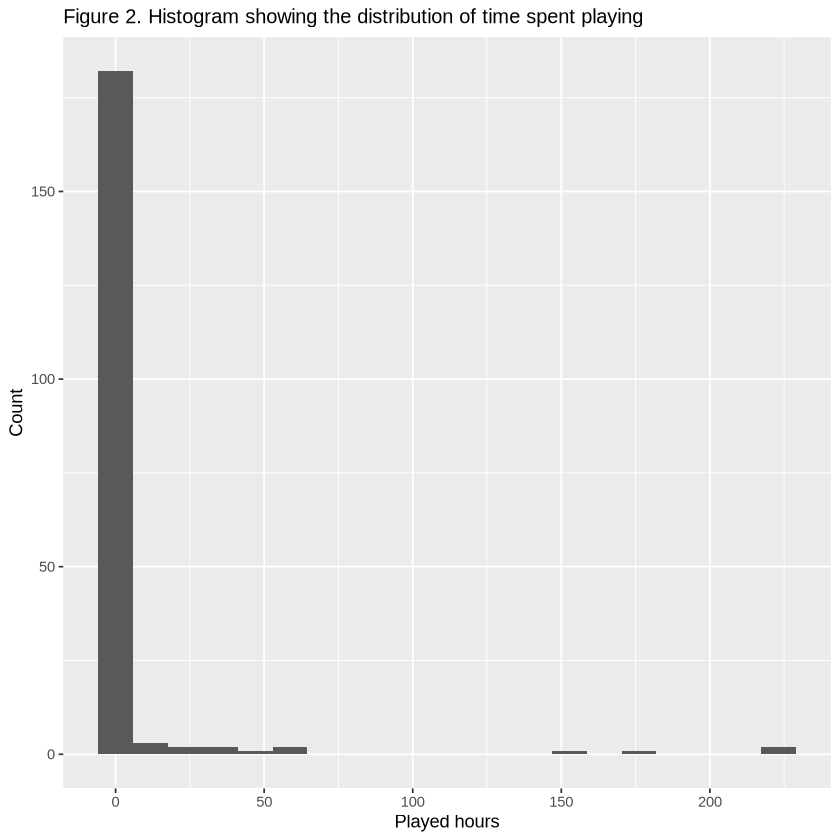

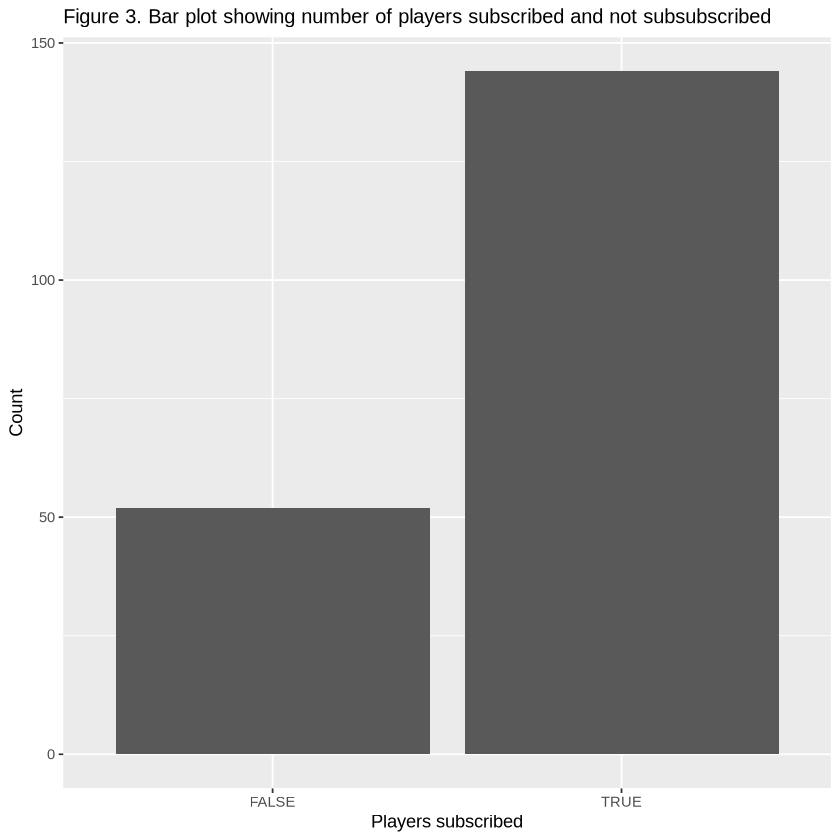

In [122]:
player_data <- read_csv("players.csv")
player_data_tidy <- clean_names(player_data)

player_summary <- player_data_tidy|> summarise(across(where(is.numeric), ~ mean(.x, na.rm = TRUE))) |> rename(mean_played_hours = played_hours, mean_age = age)
player_summary

player_age_distribution <- player_data_tidy |> 
    filter(!is.na(age)) |>
    select(age)

player_age_distribution_plot <- ggplot(player_age_distribution, aes(x = age)) + 
    geom_histogram(bins = 15) + 
    xlab("Player age (years)") + 
    ylab("Count") +
    labs(title = "Figure 1. Histogram showing the distribution of the ages of players in the dataset") +
    theme(plot.title = element_text(size = 12))

player_age_distribution_plot

player_time_spent_distribution <- player_data_tidy |> 
    filter(!is.na(played_hours)) |>
    select(played_hours)

player_time_spent_distribution_plot <- ggplot(player_time_spent_distribution, aes(x = played_hours)) + 
    geom_histogram(bins = 20) + 
    xlab("Played hours") + 
    ylab("Count") +
    labs(title = "Figure 2. Histogram showing the distribution of time spent playing") +
    theme(plot.title = element_text(size = 12))

player_time_spent_distribution_plot

player_subscribed <- player_data_tidy |> 
    filter(!is.na(subscribe)) |>
    select(subscribe) |>
    group_by(subscribe) |>
    summarize(count = n())

player_subscribed_plot <- ggplot(player_subscribed, aes(x = subscribe, y = count)) + 
    geom_bar(stat = "identity") + 
    xlab("Players subscribed") + 
    ylab("Count") +
    labs(title = "Figure 3. Bar plot showing number of players subscribed and not subsubscribed") +
    theme(plot.title = element_text(size = 12))

player_subscribed_plot




# Methods and Plan
A method to address our question is to use Kth nearest neighbour classification to determine if a player's age and time spent playing minecraft predicts whether or not they're subscribed to a gaming related newsletter. This method is appropriate as knn allows us to classify data based on inputs and in this case, we are trying to predict if a player is subscribed to a gaming newsletter given their age and time spent playing Minecraft. There are no assumptions required to apply the method selected. A potential limitation comes from the given dataset, as seen in Figure 1, is that most of the players in the dataset are aged 15 to 25. Therefore, our model is likely going to be inaccurate for players outside of that range. The model will be selected and compared using cross validation to select the optimal number of neighbours for the model. The data will be split in half, one for training and another for testing. As we are working with limited data, we will use 3 fold cross validation to determine the best model to use.